In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df_ny = pd.read_csv('NY_temp_noaa.csv',skiprows=4)
df_ny['Date']= pd.to_datetime(df_ny['Date'], format='%Y%m')
df_ny.head(2)

,Date,Value,Anomaly
0,1895-01-01,29.7,-2.0
1,1895-02-01,24.3,-8.0


In [3]:

df_ny['Date'] = pd.to_datetime(df_ny['Date'])
df_ny = df_ny.set_index('Date')
df_ny

,Value,Anomaly
Date,,
1895-01-01,29.7,-2.0
1895-02-01,24.3,-8.0
1895-03-01,35.9,-4.9
1895-04-01,49.7,-1.5
1895-05-01,63.0,1.0
...,...,...
2021-08-01,77.6,3.1
2021-09-01,70.3,2.6
2021-10-01,62.0,4.9


In [4]:
df_ny_new = df_ny.drop(['Anomaly'], axis = 1)
df_ny_new['Date2'] = df_ny_new.index.to_julian_date()


In [5]:
df_ny_new['sin(year)'] = np.sin(df_ny_new['Date2'] / 12 * 2 * np.pi)
df_ny_new['cos(year)'] = np.cos(df_ny_new['Date2'] / 12 * 2 * np.pi)
df_ny_new['sin(6mo)'] = np.sin(df_ny_new['Date2'] / (6 ) * 2 * np.pi)
df_ny_new['cos(6mo)'] = np.cos(df_ny_new['Date2'] / (6 ) * 2 * np.pi)

In [6]:
df_ny_new.head(4)

,Value,Date2,sin(year),cos(year),sin(6mo),cos(6mo)
Date,,,,,,
1895-01-01,29.7,2413194.5,-0.258819,-0.965926,0.5,8.660254e-01
1895-02-01,24.3,2413225.5,0.707107,0.707107,1.0,1.134952e-10
1895-03-01,35.9,2413253.5,0.258819,-0.965926,-0.5,8.660254e-01
1895-04-01,49.7,2413284.5,0.258819,0.965926,0.5,8.660254e-01


In [7]:
X_train = df_ny_new['1900':'2021'].drop(['Value'],axis = 1)
y_train = df_ny_new.loc['1900':'2021', 'Value']

X_test = df_ny_new['2017':].drop(['Value'],axis = 1)
y_test = df_ny_new.loc[:'2017':, 'Value']


In [8]:
from sklearn.model_selection import TimeSeriesSplit

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
model = RandomForestRegressor()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
regr = make_pipeline(PolynomialFeatures(2),LinearRegression())
#regr = LinearRegression()

#param_search = { 
#    'n_estimators': [20, 50, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [i for i in range(5,15)]
#}
#tscv = TimeSeriesSplit(n_splits=10)
#gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
regr.fit(X_train, y_train)
#best_score = gsearch.best_score_
#best_model = gsearch.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [10]:
period = 2200-2022
expended_2 = pd.Series(pd.date_range("2022-01-01", periods=period, freq="y")).to_frame(name="expended date")
expended_m_2 = pd.Series(pd.date_range("2022-01-01", periods=period*12, freq="m")).to_frame(name="expended date")

In [11]:
predi = pd.to_datetime(expended_m_2['expended date'])
predi = pd.DataFrame(predi)
predi = predi.set_index('expended date')
predi['Date2'] = predi.index.to_julian_date()
predi['sin(year)'] = 1.625*np.sin(predi['Date2'] / 12 * 2 * np.pi)
predi['cos(year)'] = 1.625*np.cos(predi['Date2'] / 12 * 2 * np.pi)
predi['sin(6mo)'] = np.sin(predi['Date2'] / (6 ) * 2 * np.pi)
predi['cos(6mo)'] = np.cos(predi['Date2'] / (6 ) * 2 * np.pi)

predi

,Date2,sin(year),cos(year),sin(6mo),cos(6mo)
expended date,,,,,
2022-01-31,2459610.5,-0.420581,-1.569629,0.5,8.660254e-01
2022-02-28,2459638.5,-1.149049,1.149049,-1.0,-1.496558e-10
2022-03-31,2459669.5,0.420581,-1.569629,-0.5,8.660254e-01
2022-04-30,2459699.5,-0.420581,1.569629,-0.5,8.660254e-01
2022-05-31,2459730.5,-0.420581,-1.569629,0.5,8.660254e-01
...,...,...,...,...,...
2199-08-31,2524470.5,-0.420581,-1.569629,0.5,8.660254e-01
2199-09-30,2524500.5,0.420581,1.569629,0.5,8.660254e-01
2199-10-31,2524531.5,-1.149049,-1.149049,1.0,1.012488e-10


In [12]:
y_true = y_test.values
y_pred = regr.predict(predi)
y_pred = np.random.normal(y_pred, 3.5)

In [13]:
#np.random.uniform(0, 5)

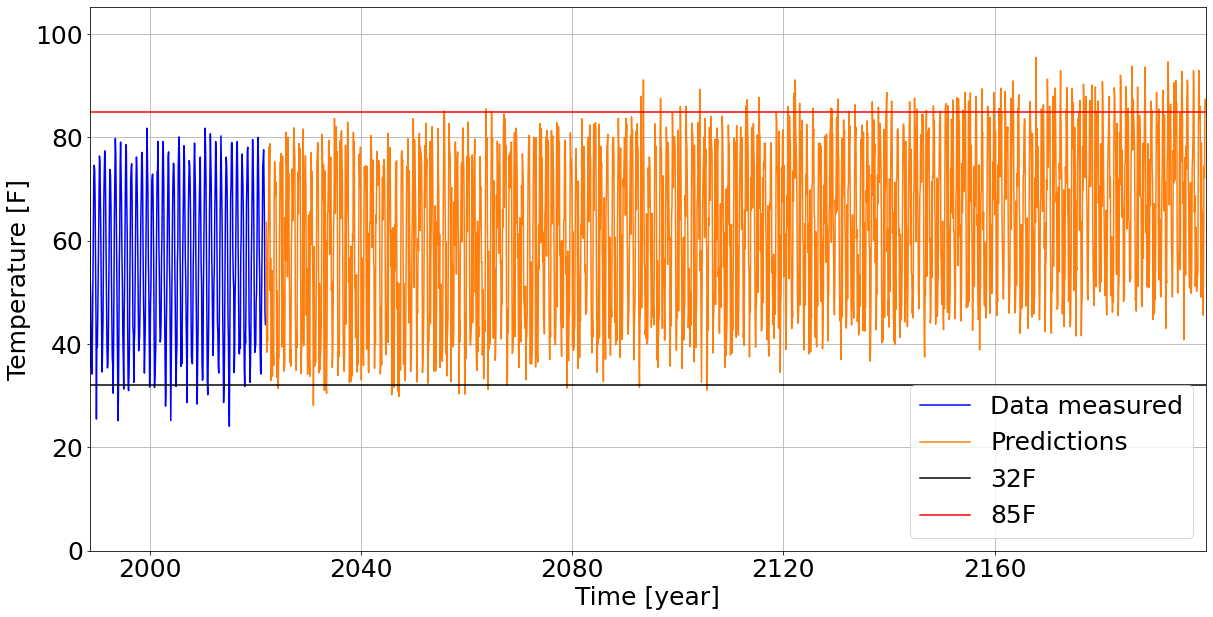

In [14]:

plt.plot(df_ny_new.index,df_ny_new['Value'],'b-',label = 'Data measured')
plt.plot(predi.index,y_pred,color='tab:orange', linestyle='-',label = 'Predictions')
plt.axhline(y=32, color='k', linestyle='-',label = '32F')
plt.axhline(y=85, color='red', linestyle='-',label = '85F')

plt.ylim(0)
plt.xlim(df_ny_new.index[-400],predi.index[2135])

plt.legend(fontsize = 25)





plt.xlabel('Time [year]',fontsize = 25)
plt.ylabel('Temperature [F]',fontsize = 25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.grid()
#plt.axhline(y=32, color='cyan', linestyle='-')
plt.savefig('NY_new',dpi=600,format='pdf')




In [15]:
df_la = pd.read_csv('LA_temp_noaa.csv',skiprows=4)
df_la['Date']= pd.to_datetime(df_la['Date'], format='%Y%m')
df_la.head(2)

,Date,Value,Anomaly
0,1944-08-01,68.0,-1.8
1,1944-09-01,66.9,-2.2


In [16]:
df_la['Date'] = pd.to_datetime(df_la['Date'])
df_la = df_la.set_index('Date')

In [17]:
df_la_new = df_la.drop(['Anomaly'], axis = 1)
df_la_new['Date2'] = df_la_new.index.to_julian_date()


In [18]:
df_la_new['sin(year)'] = np.sin(df_la_new['Date2'] / 12 * 2 * np.pi)
df_la_new['cos(year)'] = np.cos(df_la_new['Date2'] / 12 * 2 * np.pi)
df_la_new['sin(6mo)'] = np.sin(df_la_new['Date2'] / (6 ) * 2 * np.pi)
df_la_new['cos(6mo)'] = np.cos(df_la_new['Date2'] / (6 ) * 2 * np.pi)

In [19]:
X_train = df_la_new[:'2021'].drop(['Value'],axis = 1)
y_train = df_la_new.loc[:'2021', 'Value']

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
model = RandomForestRegressor()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
regr = make_pipeline(PolynomialFeatures(2),LinearRegression())
#regr = LinearRegression()

#param_search = { 
#    'n_estimators': [20, 50, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [i for i in range(5,15)]
#}
#tscv = TimeSeriesSplit(n_splits=10)
#gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
regr.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [21]:
predi = pd.to_datetime(expended_m_2['expended date'])
predi = pd.DataFrame(predi)
predi = predi.set_index('expended date')
predi['Date2'] = predi.index.to_julian_date()
predi['sin(year)'] = 1.25*np.sin(predi['Date2'] / 12 * 2 * np.pi)
predi['cos(year)'] = 1.25*np.cos(predi['Date2'] / 12 * 2 * np.pi)
predi['sin(6mo)'] = np.sin(predi['Date2'] / (6 ) * 2 * np.pi)
predi['cos(6mo)'] = np.cos(predi['Date2'] / (6 ) * 2 * np.pi)

In [22]:
y_true = y_test.values
y_pred = regr.predict(predi)
y_pred = np.random.normal(y_pred, 3.5)

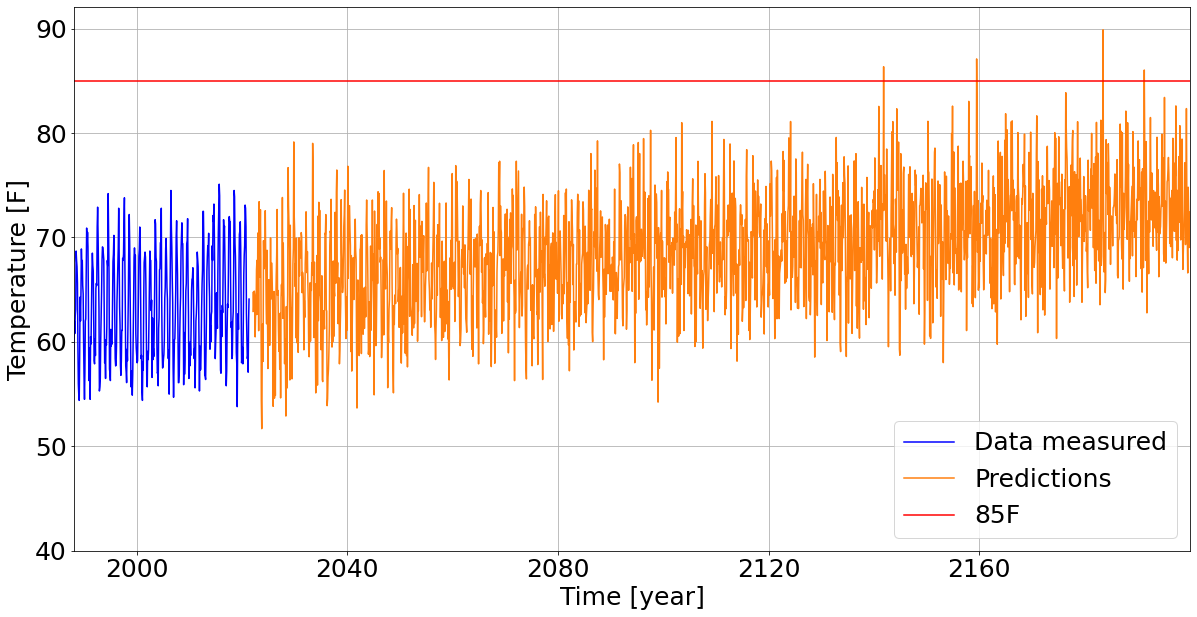

In [23]:
plt.plot(df_la_new.index,df_la_new['Value'],'b-', label='Data measured')
plt.plot(predi.index,y_pred,color='tab:orange', linestyle='-', label = 'Predictions')
#plt.axhline(y=32, color='blue', linestyle='-')
plt.axhline(y=85, color='red', linestyle='-', label = '85F')

plt.ylim(40)
plt.xlim(df_la_new.index[-400],predi.index[2135])


plt.xlabel('Time [year]',fontsize = 25)
plt.ylabel('Temperature [F]',fontsize = 25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize = 25)

#plt.axhline(y=32, color='cyan', linestyle='-')
plt.grid()
plt.savefig('LA_new',dpi=600,format='pdf')

